In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
!git clone https://github.com/luck058/kaggle-gold-price-analysis
%cd kaggle-gold-price-analysis


Cloning into 'kaggle-gold-price-analysis'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 36 (delta 19), reused 12 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (36/36), 673.67 KiB | 2.21 MiB/s, done.
Resolving deltas: 100% (19/19), done.
/content/kaggle-gold-price-analysis


In [ ]:
df = pd.read_csv('financial_regression_cleaned.csv')

In [ ]:
display(df.head())
print(df.shape)

,Unnamed: 0,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,18305238.0
1,1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
2,3,2010-01-19,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,...,47.08,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0
3,4,2010-01-20,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,...,47.31,45.17,47.05,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0
4,5,2010-01-21,113.92,114.27,111.56,111.70,344747028.0,2.71,46.06,46.350,...,46.98,45.07,45.30,388457.0,1.91,108.48,108.78,106.61,107.37,25747831.0


(3719, 45)


In [ ]:
nan_counts = df.isna().sum()
#print(nan_counts)

In [ ]:
#convert to datetotime and then finding diff between current day and last day
df['date'] = pd.to_datetime(df['date'])
df['date diff'] = df['date'].diff()
#printing the value counts for each date diff group
print(df["date diff"].value_counts())


date diff
1 days    2914
3 days     669
4 days     101
2 days      33
5 days       1
Name: count, dtype: int64


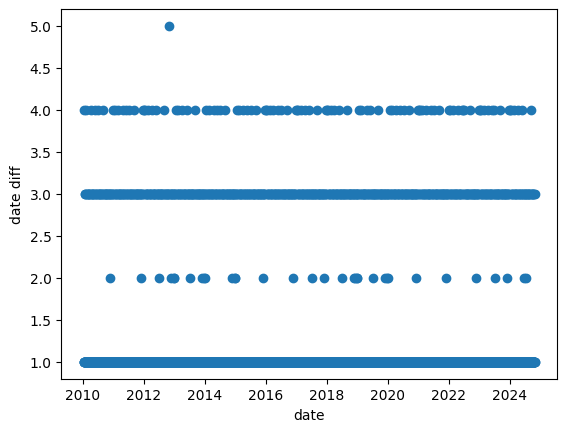

In [ ]:
plt.scatter(df["date"][1:], df["date diff"].dt.days[1:])
# creating scatter plot of the points for each grouping
plt.xlabel("date")
plt.ylabel("date diff")
plt.show()


**Analysis Section:**

In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'date', 'sp500 open', 'sp500 high', 'sp500 low',
       'sp500 close', 'sp500 volume', 'sp500 high-low', 'nasdaq open',
       'nasdaq high', 'nasdaq low', 'nasdaq close', 'nasdaq volume',
       'nasdaq high-low', 'usd_chf', 'eur_usd', 'silver open', 'silver high',
       'silver low', 'silver close', 'silver volume', 'silver high-low',
       'oil open', 'oil high', 'oil low', 'oil close', 'oil volume',
       'oil high-low', 'platinum open', 'platinum high', 'platinum low',
       'platinum close', 'platinum volume', 'platinum high-low',
       'palladium open', 'palladium high', 'palladium low', 'palladium close',
       'palladium volume', 'palladium high-low', 'gold open', 'gold high',
       'gold low', 'gold close', 'gold volume', 'date diff'],
      dtype='object')


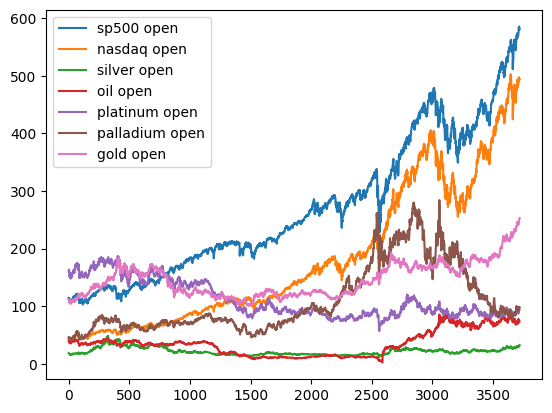

In [ ]:
df_open = pd.DataFrame()
#not inclusive of volumn and open columns
#dont use ones with volume and use the ones with open
for column in df.columns[2:-1]:
  if "volume" in column:
    continue
  if "open" not in column:
    continue

  #fill in the dataframe for a column
  df_open[column] = df[column]

  plt.plot(df[column], label = column)
  #make it
plt.legend()
plt.show()

#add legend
#and make it visible



Correlation Data:

In [ ]:
styled_df = df_open.corr().style.background_gradient(cmap='Blues')
display(styled_df)

,sp500 open,nasdaq open,silver open,oil open,platinum open,palladium open,gold open
sp500 open,1.000000,0.991532,-0.062871,0.581236,-0.694140,0.644610,0.681216
nasdaq open,0.991532,1.000000,0.013091,0.624716,-0.637935,0.645362,0.738224
silver open,-0.062871,0.013091,1.000000,0.456053,0.627806,-0.023531,0.600809
oil open,0.581236,0.624716,0.456053,1.000000,0.053159,0.270175,0.753595
platinum open,-0.694140,-0.637935,0.627806,0.053159,1.000000,-0.464430,-0.106921
palladium open,0.644610,0.645362,-0.023531,0.270175,-0.464430,1.000000,0.439741
gold open,0.681216,0.738224,0.600809,0.753595,-0.106921,0.439741,1.000000


**Implementation of Forward Subset Selection and Creating Lagged Value Features to Create Model**

In [ ]:
gold_open_mean = df['gold open'].mean()
gold_open_std = df['gold open'].std()
gold_open_var = df['gold open'].var()
print(gold_open_mean, gold_open_std, gold_open_var)

145.45497547727885 29.604258919531215 876.4121461746436


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Sample dataset
#'df' contains the features (S&P500, Nasdaq, Silver, Oil, Platinum, Palladium and Target Gold)

#normalization


df = (df - df.mean()) / df.std()

target = 'gold open'
features = [col for col in df.columns if col != target]

#split into training and testing

# Create Lagged Features
lags = 3
#creating lag
for lag in range(1, lags + 1):
  df[f'gold_open_t-{lag}'] = df['gold open'].shift(lag)

df = df.dropna()

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<ipython-input-159-fd5500ba4e5b>:13: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized.
  df = (df - df.mean()) / df.std()
<ipython-input-159-fd5500ba4e5b>:13: PerformanceWarning: Adding/subtracting object-dtype array to TimedeltaArray not vectorized.
  df = (df - df.mean()) / df.std()


In [ ]:
def forward_selection(X_train, y_train, features, max_features=None):
    """
    Perform forward selection to find the best subset of features.
    Input:
      X_train: Training Data from df.
      y_train: Target values in sequence.
      features: List of potential features.
      max_features: Maximum number of features.
    Output:
      List of selected features.
    """

    selected_features = []
    remaining_features = features[:]
    best_sc = float('inf')
    max_features = max_features or len(features)

    while remaining_features and len(selected_features) < max_features:
      scores = {}
      #create subset and train model on this subset and derive mse
      for feature in remaining_features:
        current_features = selected_features + [feature]
        X_subset = X_train[current_features]

        model = LinearRegression()
        model.fit(X_subset, y_train)
        predictions = model.predict(X_subset)

        #look at performance and that is the score
        score = mean_squared_error(y_train, predictions)
        scores[feature] = score
      #select features with the best improvement
      best_feature = min(scores, key=scores.get)

      if scores[best_feature] < best_sc:
        best_sc = scores[best_feature]
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
      else:
        break

    return selected_features


In [ ]:
selected_features = forward_selection(X_train, y_train, features, max_features=15)
final_model = LinearRegression()
final_model.fit(X_train[selected_features], y_train)

#Evaluate on test data
y_test_predictions = final_model.predict(X_test[selected_features])
test_mse = mean_squared_error(y_test, y_test_predictions)
print(f"Selected Features: {selected_features}")
print(f"Test MSE: {test_mse}")

Selected Features: ['gold high', 'gold low', 'gold close', 'oil high', 'oil open', 'sp500 volume', 'platinum high-low', 'silver high-low', 'oil low', 'oil close', 'oil volume', 'palladium high-low', 'sp500 high-low', 'nasdaq high-low', 'silver close']
Test MSE: 0.00020656524619096274


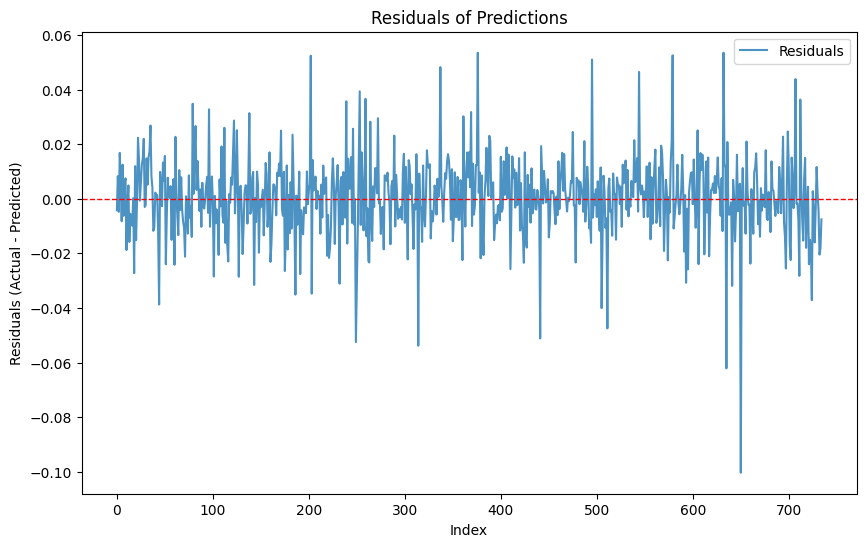

In [ ]:
# Residuals
residuals = y_test - y_test_predictions

# Residual plot
#Ideally, the residuals should be randomly distributed near 0
plt.figure(figsize=(10, 6))
plt.plot(residuals.values, label="Residuals", alpha=0.8)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title("Residuals of Predictions")
plt.xlabel("Index")
plt.ylabel("Residuals (Actual - Predicted)")
plt.legend()
plt.show()


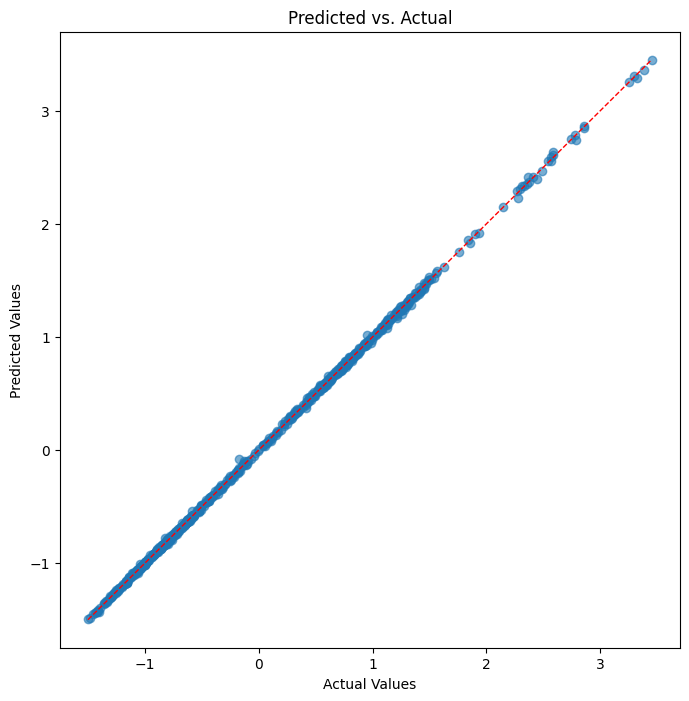

In [ ]:
# Scatter plot # Predicted v Actual
#Optimal Model would be y = x line
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_test_predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=1)  # Perfect prediction line
plt.title("Predicted vs. Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


In [ ]:
# Unnormalize predictions and actual values

y_test_predictions_original = (y_test_predictions * gold_open_std) + gold_open_mean
y_test_original = (y_test * gold_open_std) + gold_open_mean

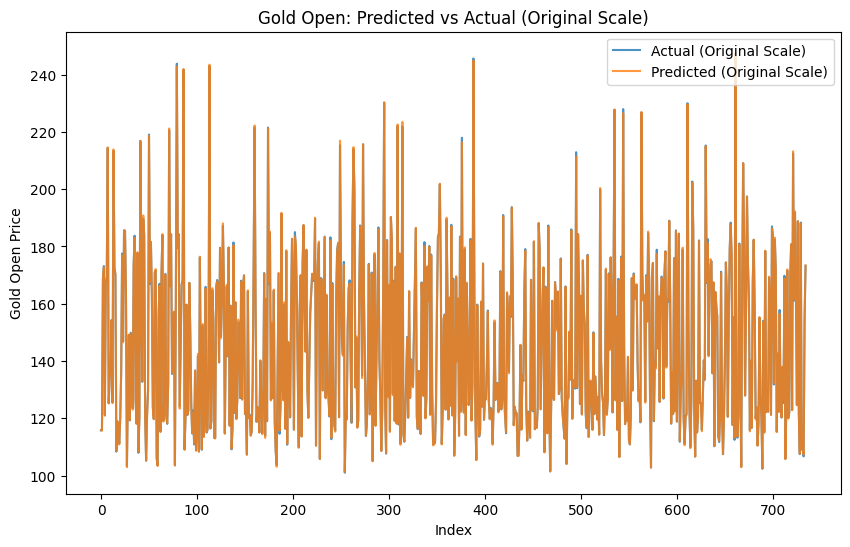

Test MSE (Original Scale): 0.18103629073931546
Variance of gold open: 876.4121461746436


In [ ]:
# Visualize predictions vs actuals in original scale
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_original.values, label="Actual (Original Scale)", alpha=0.8)
plt.plot(y_test_predictions_original, label="Predicted (Original Scale)", alpha=0.8)
plt.title("Gold Open: Predicted vs Actual (Original Scale)")
plt.xlabel("Index")
plt.ylabel("Gold Open Price")
plt.legend()
plt.show()

# Calculate MSE in original scale
original_scale_mse = mean_squared_error(y_test_original, y_test_predictions_original)
print(f"Test MSE (Original Scale): {original_scale_mse}")
print(f"Variance of gold open: {gold_open_var}")